In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

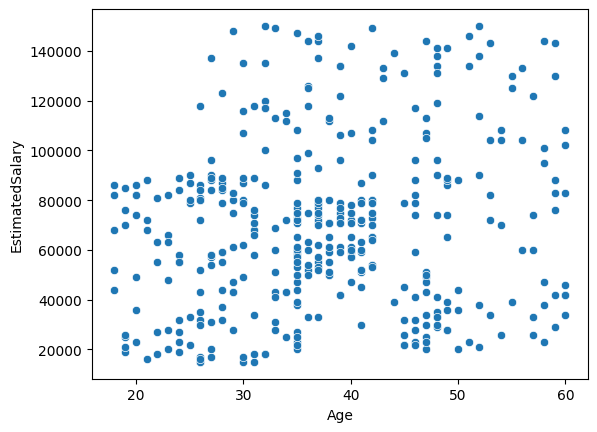

In [8]:
sns.scatterplot(x=df.iloc[:,0],y = df.iloc[:,1])

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=2)

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6666 - loss: 5930.6357 - val_accuracy: 0.6000 - val_loss: 2946.1394
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6373 - loss: 1454.9202 - val_accuracy: 0.4000 - val_loss: 1250.5267
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3889 - loss: 978.3887 - val_accuracy: 0.6000 - val_loss: 809.6084
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6456 - loss: 646.8723 - val_accuracy: 0.4000 - val_loss: 289.1016
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4824 - loss: 215.7707 - val_accuracy: 0.6000 - val_loss: 38.9865
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4657 - loss: 137.2813 - val_accuracy: 0.6000 - val_loss: 102.9411
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5012 - loss: 96.1806 - val_accuracy: 0.4000 - val_loss: 25.8306
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4002 - loss: 66.

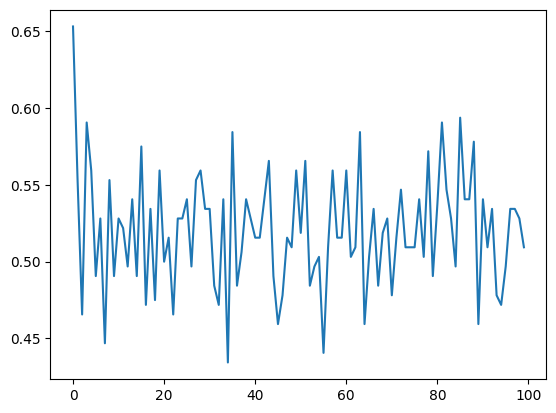

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

# Applying **Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

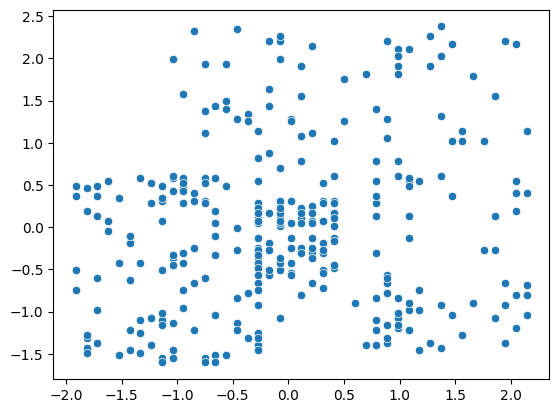

In [25]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [26]:
model = Sequential()

model.add(Dense(128,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test), epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3775 - loss: 0.7044 - val_accuracy: 0.7625 - val_loss: 0.6444
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7867 - loss: 0.6365 - val_accuracy: 0.8500 - val_loss: 0.5865
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8067 - loss: 0.5921 - val_accuracy: 0.8125 - val_loss: 0.5394
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8500 - loss: 0.5394 - val_accuracy: 0.8000 - val_loss: 0.4984
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8601 - loss: 0.5007 - val_accuracy: 0.8000 - val_loss: 0.4648
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8764 - loss: 0.4612 - val_accuracy: 0.8000 - val_loss: 0.4372
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8325 - loss: 0.4592 - val_accuracy: 0.8125 - val_loss: 0.4140
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8864 - loss: 0.4198 - val_accuracy: 0.8125 - val_loss

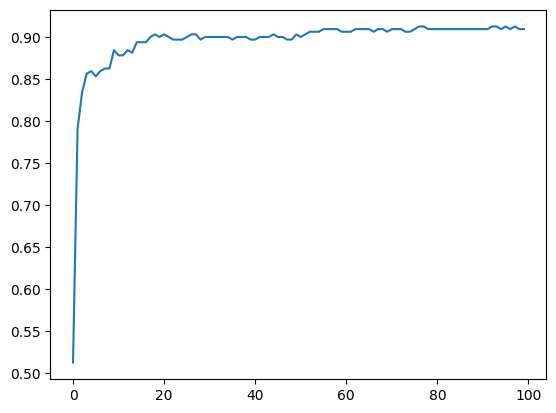

In [27]:
plt.plot(history.history['accuracy'])